# Loan default prediction

# KNN Classifier

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [42]:
data=pd.read_csv("Default_Fin.csv")
data = data.drop(['Index'],axis=1) # as index is nothing to do with the defualt we drop the column
data.rename(columns={'Defaulted?': 'Defaulted'}, inplace=True)
data

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [43]:
data.describe()

,Employed,Bank Balance,Annual Salary,Defaulted
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted      10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Bank Balance'] = scaler.fit_transform(data[['Bank Balance']])
data

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,-0.218828,532339.56,0
1,0,-0.037617,145273.56,0
2,1,0.492412,381205.68,0
3,1,-0.632894,428453.88,0
4,1,-0.102782,461562.00,0
...,...,...,...,...
9995,1,-0.255979,635908.56,0
9996,1,-0.160050,235928.64,0
9997,1,0.020747,703633.92,0
9998,1,1.516744,440029.32,0


### EDA

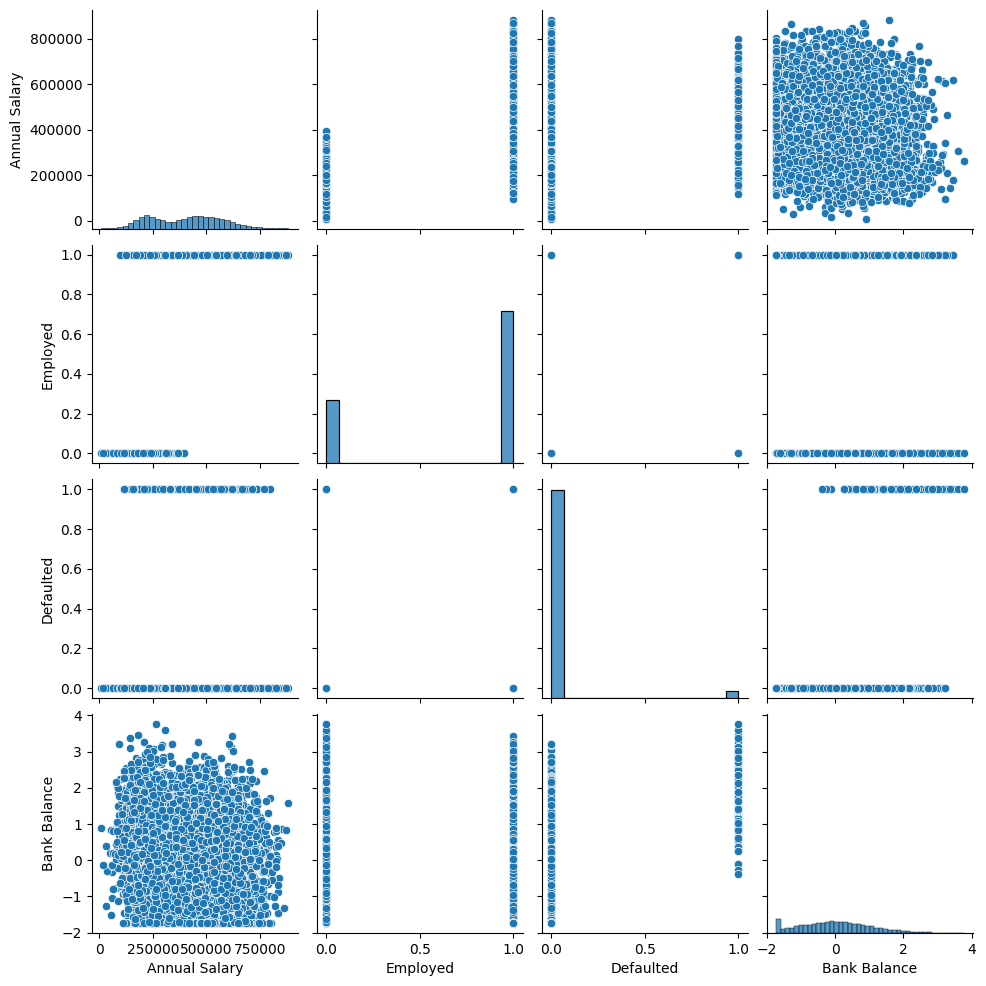

In [47]:
import seaborn as sns
sns.pairplot(data[['Annual Salary','Employed','Defaulted','Bank Balance']])
plt.show()

In [48]:
correlation_matrix = data.corr()
correlation_matrix

,Employed,Bank Balance,Annual Salary,Defaulted
Employed,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,0.753985,-0.152243,1.000000,-0.019871
Defaulted,-0.035420,0.350119,-0.019871,1.000000


as we have high correlation between annual salary and employed we have to drop one of those columns.

### setting up x,y

In [50]:
X=data.drop(columns=['Defaulted','Annual Salary'])
Y=data['Defaulted']
X

,Employed,Bank Balance
0,1,-0.218828
1,0,-0.037617
2,1,0.492412
3,1,-0.632894
4,1,-0.102782
...,...,...
9995,1,-0.255979
9996,1,-0.160050
9997,1,0.020747
9998,1,1.516744


In [51]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Defaulted, Length: 10000, dtype: int64

### Spliting dataset into training and testing data

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state = 56, test_size=0.2)

In [53]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

### Implementing KNN Classifier

### Elbow for Finding K-Value

In [54]:
## Function For Finding K-Value
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(x_train,y_train)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(x_test)
        tmp = f1_score(tmp,y_test)
        error = 1-tmp
        test_error.append(error)
    return test_error

### calculating elbow functions for various k values

In [55]:
#Defining K range
k = range(2, 30, 1)
# calling above defined function
test = Elbow(k)


### ploting graph for various k values and test errors

The minimum value of test is 0.5625 at k = 13


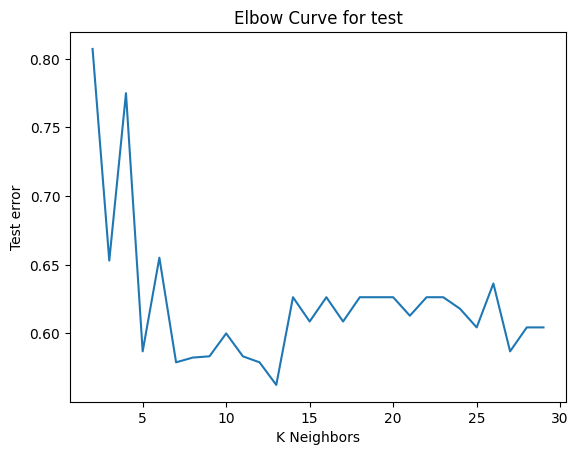

In [56]:
# plotting the Curves
import matplotlib.pyplot as plt
plt.plot(k, test)

plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

min_value = min(test)
min_index = test.index(min_value)
best_k = k[min_index]
print(f"The minimum value of test is {min_value} at k = {best_k}")

as the minimum value of test is 0.5625 at 13, we consider  K value as 13

In [57]:
# i am taking k value has 13
clf=KNN(n_neighbors=3)
clf.fit(x_train,y_train)
test_predict=clf.predict(x_test)


In [58]:
from sklearn.metrics  import accuracy_score 
acc = accuracy_score (test_predict, y_test)
acc

0.968

The accuracy for KNN is 96.8

# Decision Tree

In [59]:
data.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,-0.218828,532339.56,0
1,0,-0.037617,145273.56,0
2,1,0.492412,381205.68,0
3,1,-0.632894,428453.88,0
4,1,-0.102782,461562.00,0


In [62]:
X=data.drop(columns=['Defaulted'])
Y=data["Defaulted"]

### spliting data into  training and testing data

In [63]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size =0.2,random_state = 42)

### setting up and Implementing decision tree classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=5)

In [65]:
# Train the model
model = DT.fit(X_train,y_train)

In [66]:
# Predict on the test set
y_pred = model.predict(X_test)

### calculating accuracy 

In [67]:
# Calculate accuracy
from sklearn.metrics import accuracy_score

In [68]:
#accuracy = accuracy_score(y_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.969

#### accuracy score = 96.9

In [69]:
from sklearn import tree

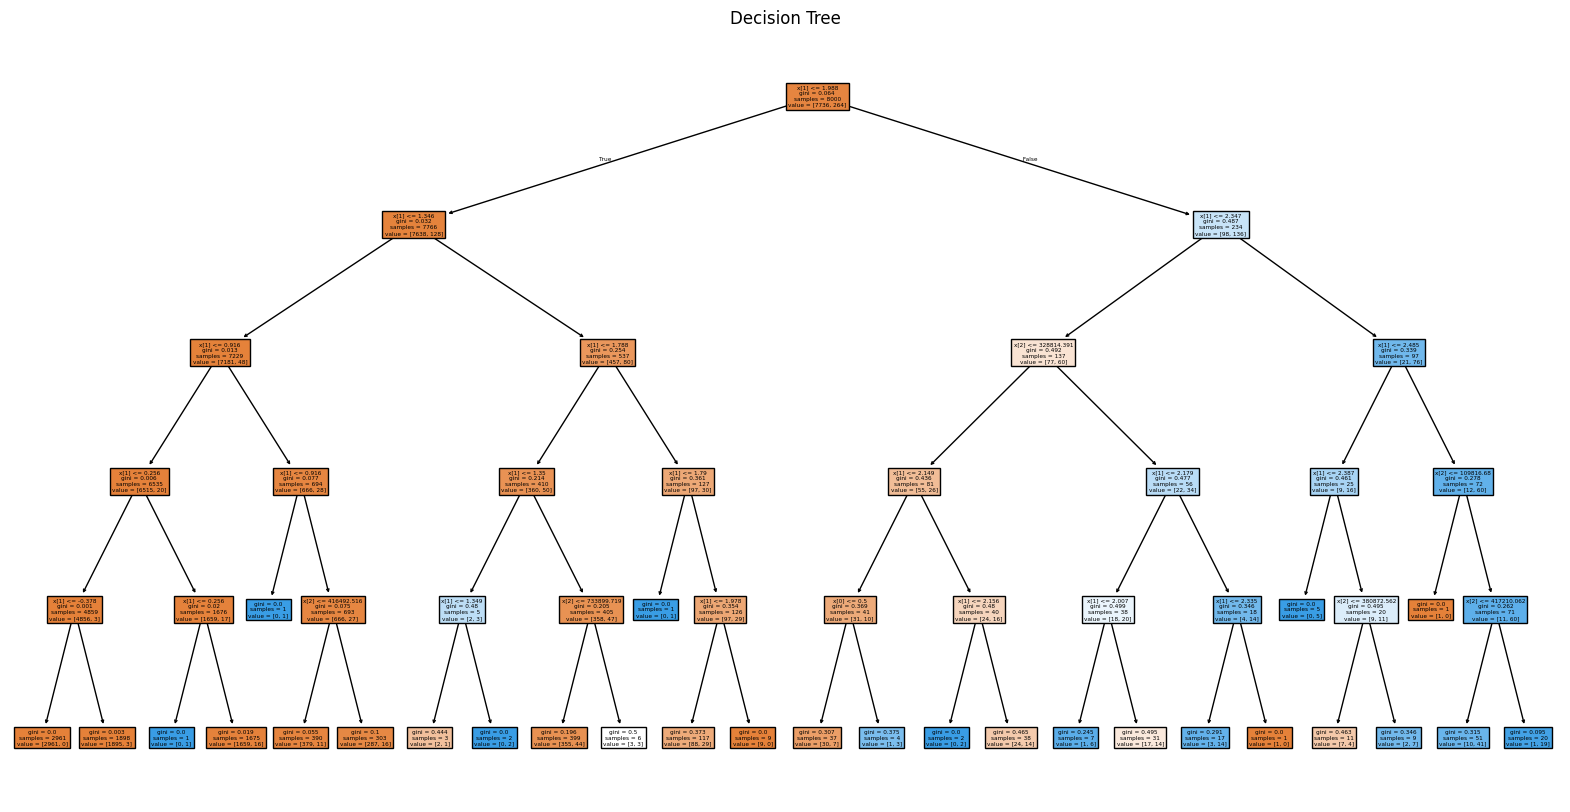

In [70]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True)
plt.title("Decision Tree")
plt.show()

# Logistics Regression

In [71]:
data

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,-0.218828,532339.56,0
1,0,-0.037617,145273.56,0
2,1,0.492412,381205.68,0
3,1,-0.632894,428453.88,0
4,1,-0.102782,461562.00,0
...,...,...,...,...
9995,1,-0.255979,635908.56,0
9996,1,-0.160050,235928.64,0
9997,1,0.020747,703633.92,0
9998,1,1.516744,440029.32,0


In [73]:
X=data.drop(columns=['Defaulted'])
Y=data["Defaulted"]

### spliting data into training and testing data

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### scaling data 

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Implementing Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1.0) # C = 1.0 represents 
classifier.fit(X_train, y_train)

LogisticRegression()

In [77]:
y_pred = classifier.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,y_pred)
print("Accuracy score of testing data: " + str(accuracy_score))

Accuracy score of testing data: 0.9708


#### accuracy : 97.08 

# Random Forest

In [79]:
data.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,-0.218828,532339.56,0
1,0,-0.037617,145273.56,0
2,1,0.492412,381205.68,0
3,1,-0.632894,428453.88,0
4,1,-0.102782,461562.00,0


### spliting data into training and testing data

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

#### scaling

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### implementing Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [83]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [84]:
prediction=RFC.predict(X_test)
RFC.score(X_test,y_test)

0.9664

### Accuracy = 96.8 

# Conclusion
 Comparing the accuracy scores of classifing methods like KNN classifier, Random Forest classifier, Decision tree classifier, logistic regression  . we can conclude that the highest accuracy score of 97.08 is acheived by using Logistic Regression.